In [1]:
import pandas as pd
import numpy as np

def analyze_datasets(datasets_info):
    results = []
    
    for dataset in datasets_info:
        file_path = dataset['file']
        text_column = dataset['text_column']
        label_column = dataset.get('label_column', None)
        
        df = pd.read_csv(f'../datasets/{file_path}')
        
        num_instances = len(df)
        avg_text_length = df[text_column].astype(str).apply(lambda x: len(x.split())).mean()
        vocab_size = len(set(" ".join(df[text_column].astype(str)).split()))
        
        classification_type = "N/A"
        num_classes = "N/A"
        class_distribution = "N/A"
        
        if label_column and label_column in df.columns:
            unique_classes = df[label_column].nunique()
            num_classes = unique_classes
            classification_type = "Binary" if unique_classes == 2 else "Multiclass"
            class_distribution = df[label_column].value_counts(normalize=True).to_dict()
        
        results.append({
            "Dataset": file_path,
            "Size (number of instances)": num_instances,
            "Average text length": avg_text_length,
            "Number of unique words": vocab_size,
            "Classification type": classification_type,
            "Number of classes": num_classes,
            "Class distribution": class_distribution
        })
    
    return pd.DataFrame(results)

# Use
datasets_info = [
    {"file": "website_classification.csv", "text_column": "cleaned_website_text", "label_column": "Category"},
    {"file": "document_classification.csv", "text_column": "data", "label_column": "labels_target"},
    {"file": "spam_or_ham.csv", "text_column": "sms", "label_column": "label"}, 
    {"file": "emotions-6000.csv", "text_column": "sentence", "label_column": "label"},
    {"file": "sentiment_reviews_dataset.csv", "text_column": "sentence", "label_column": "label"},
]

df_summary = analyze_datasets(datasets_info)
display(df_summary)

,Dataset,Size (number of instances),Average text length,Number of unique words,Classification type,Number of classes,Class distribution
0,website_classification.csv,1408,747.007102,60108,Multiclass,16,"{'Education': 0.08096590909090909, 'Business/C..."
1,document_classification.csv,2225,384.166292,64151,Multiclass,5,"{'sport': 0.22966292134831462, 'business': 0.2..."
2,spam_or_ham.csv,5574,15.591676,15733,Binary,2,"{0: 0.8659849300322928, 1: 0.1340150699677072}"
3,emotions-6000.csv,4203,11.232453,3449,Multiclass,6,"{'sadness': 0.1670235546038544, 'joy': 0.16678..."
4,sentiment_reviews_dataset.csv,1000,10.894000,2969,Binary,2,"{1: 0.5, 0: 0.5}"


In [2]:
from scipy.stats import entropy

def analyze_datasets(datasets_info):
    results = []
    
    for dataset in datasets_info:
        file_path = dataset['file']
        text_column = dataset['text_column']
        label_column = dataset.get('label_column', None)
        
        df = pd.read_csv(f'../datasets/{file_path}')
        
        num_instances = len(df)
        avg_text_length = df[text_column].astype(str).apply(lambda x: len(x.split())).mean()
        vocab_size = len(set(" ".join(df[text_column].astype(str)).split()))
        
        classification_type = "N/A"
        num_classes = "N/A"
        class_distribution_summary = "N/A"
        entropy_value = "N/A"
        
        if label_column and label_column in df.columns:
            unique_classes = df[label_column].nunique()
            num_classes = unique_classes
            classification_type = "Binary" if unique_classes == 2 else "Multiclass"
            
            value_counts = df[label_column].value_counts(normalize=True)
            top_classes = value_counts.head(3).to_dict()
            class_distribution_summary = ", ".join([f"{k}: {v:.2%}" for k, v in top_classes.items()])
            
            entropy_value = entropy(value_counts, base=2)  # Entropy of class distribution

            # Entropy normalization
            max_entropy = np.log2(unique_classes)  # Maximum entropy for the number of classes
        
        results.append({
            "Dataset": file_path,
            "Size (number of instances)": num_instances,
            "Average text length": avg_text_length,
            "Number of unique words": vocab_size,
            "Classification type": classification_type,
            "Number of classes": num_classes,
            "Class distribution (Top 3)": class_distribution_summary,
            "Class entropy": entropy_value,
            "Maximum entropy": max_entropy
        })

    return pd.DataFrame(results)


# Use
datasets_info = [
    {"file": "website_classification.csv", "text_column": "cleaned_website_text", "label_column": "Category"},
    {"file": "document_classification.csv", "text_column": "data", "label_column": "labels_target"},
    {"file": "spam_or_ham.csv", "text_column": "sms", "label_column": "label"}, 
    {"file": "emotions-6000.csv", "text_column": "sentence", "label_column": "label"},
    {"file": "sentiment_reviews_dataset.csv", "text_column": "sentence", "label_column": "label"},
]

df_summary = analyze_datasets(datasets_info)
display(df_summary)

,Dataset,Size (number of instances),Average text length,Number of unique words,Classification type,Number of classes,Class distribution (Top 3),Class entropy,Maximum entropy
0,website_classification.csv,1408,747.007102,60108,Multiclass,16,"Education: 8.10%, Business/Corporate: 7.74%, T...",3.894420,4.000000
1,document_classification.csv,2225,384.166292,64151,Multiclass,5,"sport: 22.97%, business: 22.92%, politics: 18.74%",2.311263,2.321928
2,spam_or_ham.csv,5574,15.591676,15733,Binary,2,"0: 86.60%, 1: 13.40%",0.568348,1.000000
3,emotions-6000.csv,4203,11.232453,3449,Multiclass,6,"sadness: 16.70%, joy: 16.68%, anger: 16.65%",2.584962,2.584963
4,sentiment_reviews_dataset.csv,1000,10.894000,2969,Binary,2,"1: 50.00%, 0: 50.00%",1.000000,1.000000


# Correlation graph

## TF-IDF

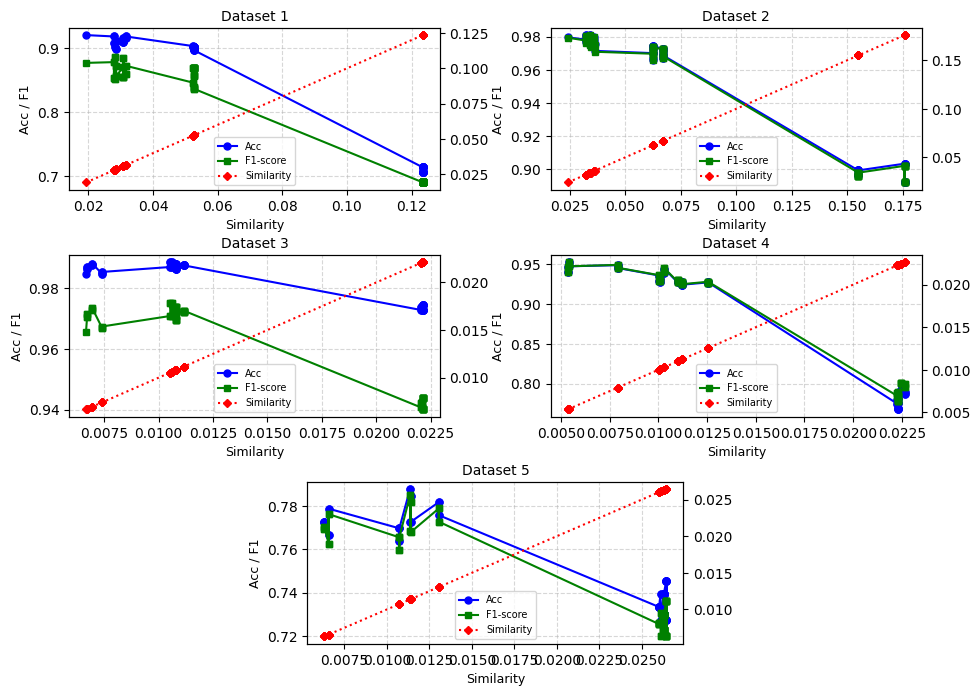

In [3]:
import pandas as pd
df = pd.read_csv(f'../Experiments/Results.csv')
df = df[df['vectorization']=='tfidf']
datasets = ["website_classification.csv", "document_classification.csv", "spam_or_ham.csv", "emotions-6000.csv", "sentiment_reviews_dataset.csv"]

list_sim, list_acc, list_f1 = [], [], []

for i in datasets:
    list_sim.append(list(df[df['dataset']==i].sort_values(by="score_similarity")['score_similarity']))
    list_acc.append(list(df[df['dataset']==i].sort_values(by="score_similarity")['accuracy_test']))
    list_f1.append(list(df[df['dataset']==i].sort_values(by="score_similarity")['f1_test']))


import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

# 5 experiments
experiments = [
    {
        'Accuracy': list_acc[0],
        'F1-score': list_f1[0],
        'Similarity': list_sim[0],
        'Title': 'Dataset 1'
    },
    {
        'Accuracy': list_acc[1],
        'F1-score': list_f1[1],
        'Similarity': list_sim[1],
        'Title': 'Dataset 2'
    },
    {
        'Accuracy': list_acc[2],
        'F1-score': list_f1[2],
        'Similarity': list_sim[2],
        'Title': 'Dataset 3'
    },
    {
        'Accuracy': list_acc[3],
        'F1-score': list_f1[3],
        'Similarity': list_sim[3],
        'Title': 'Dataset 4'
    },
    {
        'Accuracy': list_acc[4],
        'F1-score': list_f1[4],
        'Similarity': list_sim[4],
        'Title': 'Dataset 5'
    }
]

# Set up the grid: 3 rows, 2 columns (compact layout)
fig = plt.figure(figsize=(11, 8))  # Total figure size
gs = GridSpec(3, 2, figure=fig, height_ratios=[1, 1, 1], hspace=0.4, wspace=0.3)

# Subplot positions:
# - Row 0: Subplots 0 and 1 (2 figures on top)
# - Row 1: Subplots 2 and 3 (2 figures in the middle)
# - Row 2: Subplot 4 (centered, spans both columns)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

inner_gs = GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[2, :], width_ratios=[0.5, 1, 0.5])
ax4 = fig.add_subplot(inner_gs[0, 1])

axes = [ax0, ax1, ax2, ax3, ax4]

# Loop to plot each experiment
for idx, ax in enumerate(axes):
    exp = experiments[idx]
    df = pd.DataFrame(exp).sort_values(by='Similarity')

    # Accuracy e F1
    ax.plot(df['Similarity'], df['Accuracy'], marker='o', color='blue', label='Acc', markersize=5)
    ax.plot(df['Similarity'], df['F1-score'], marker='s', color='green', label='F1-score', markersize=5)
    ax.set_xlabel('Similarity', fontsize=9)
    ax.set_ylabel('Acc / F1', fontsize=9)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(exp['Title'], fontsize=10, pad=5)

    # Similarity
    ax2 = ax.twinx()
    ax2.plot(df['Similarity'], df['Similarity'], marker='D', color='red', linestyle=':', label='Similarity', markersize=4)

    # Labels
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='lower center', fontsize=7)

# Save and show
plt.savefig('Correlation TF-IDF.png')
plt.show()

## BoW

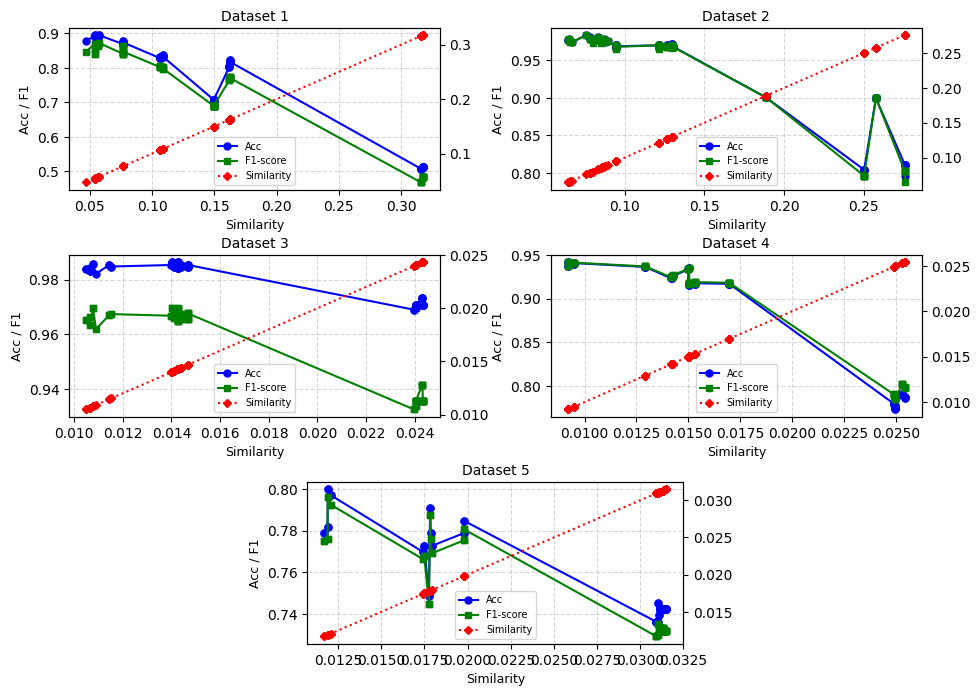

In [4]:
import pandas as pd

df = pd.read_csv(f'../Experiments/Results.csv')
df = df[df['vectorization']=='bow']
datasets = ["website_classification.csv", "document_classification.csv", "spam_or_ham.csv", "emotions-6000.csv", "sentiment_reviews_dataset.csv"]

list_sim, list_acc, list_f1 = [], [], []

for i in datasets:
    list_sim.append(list(df[df['dataset']==i].sort_values(by="score_similarity")['score_similarity']))
    list_acc.append(list(df[df['dataset']==i].sort_values(by="score_similarity")['accuracy_test']))
    list_f1.append(list(df[df['dataset']==i].sort_values(by="score_similarity")['f1_test']))


import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

# 5 experiments
experiments = [
    {
        'Accuracy': list_acc[0],
        'F1-score': list_f1[0],
        'Similarity': list_sim[0],
        'Title': 'Dataset 1'
    },
    {
        'Accuracy': list_acc[1],
        'F1-score': list_f1[1],
        'Similarity': list_sim[1],
        'Title': 'Dataset 2'
    },
    {
        'Accuracy': list_acc[2],
        'F1-score': list_f1[2],
        'Similarity': list_sim[2],
        'Title': 'Dataset 3'
    },
    {
        'Accuracy': list_acc[3],
        'F1-score': list_f1[3],
        'Similarity': list_sim[3],
        'Title': 'Dataset 4'
    },
    {
        'Accuracy': list_acc[4],
        'F1-score': list_f1[4],
        'Similarity': list_sim[4],
        'Title': 'Dataset 5'
    }
]

# Set up the grid: 3 rows, 2 columns (compact layout)
fig = plt.figure(figsize=(11, 8))  # Total figure size
gs = GridSpec(3, 2, figure=fig, height_ratios=[1, 1, 1], hspace=0.4, wspace=0.3)

# Subplot positions:
# - Row 0: Subplots 0 and 1 (2 figures on top)
# - Row 1: Subplots 2 and 3 (2 figures in the middle)
# - Row 2: Subplot 4 (centered, spans both columns)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

inner_gs = GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[2, :], width_ratios=[0.5, 1, 0.5])
ax4 = fig.add_subplot(inner_gs[0, 1])

axes = [ax0, ax1, ax2, ax3, ax4]

# Loop to plot each experiment
for idx, ax in enumerate(axes):
    exp = experiments[idx]
    df = pd.DataFrame(exp).sort_values(by='Similarity')

    # Accuracy e F1
    ax.plot(df['Similarity'], df['Accuracy'], marker='o', color='blue', label='Acc', markersize=5)
    ax.plot(df['Similarity'], df['F1-score'], marker='s', color='green', label='F1-score', markersize=5)
    ax.set_xlabel('Similarity', fontsize=9)
    ax.set_ylabel('Acc / F1', fontsize=9)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(exp['Title'], fontsize=10, pad=5)

    # Similarity
    ax2 = ax.twinx()
    ax2.plot(df['Similarity'], df['Similarity'], marker='D', color='red', linestyle=':', label='Similarity', markersize=4)

    # Labels
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='lower center', fontsize=7)

# Save and show
plt.savefig('Correlation BOW.png')
plt.show()

## Word2Vec

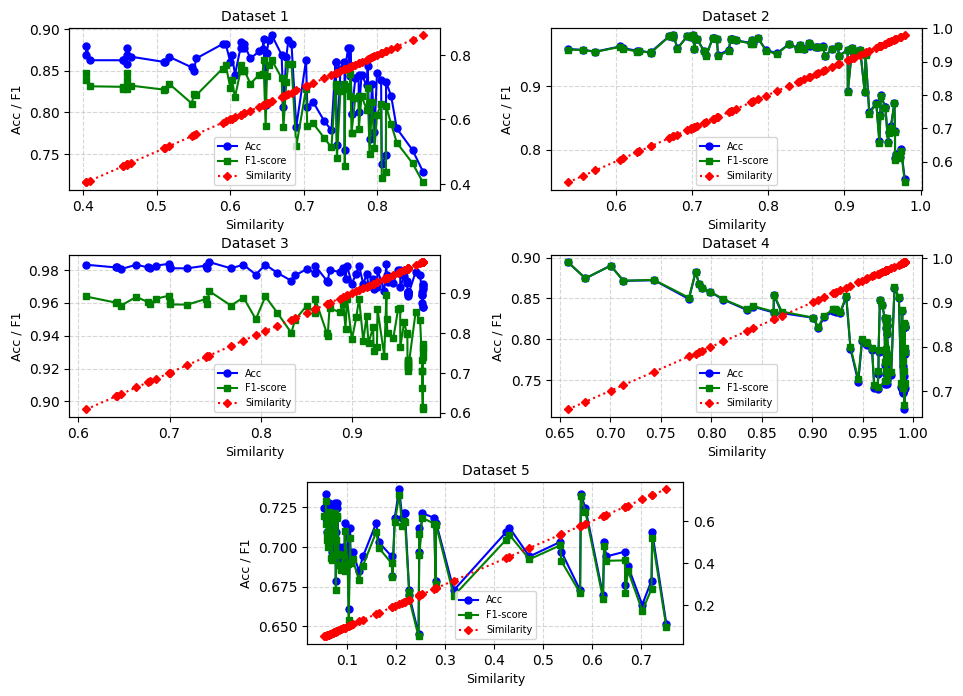

In [ ]:
import pandas as pd

df = pd.read_csv(f'../Experiments/Results.csv')
df = df[df['vectorization']=='word2vec']
datasets = ["website_classification.csv", "document_classification.csv", "spam_or_ham.csv", "emotions-6000.csv", "sentiment_reviews_dataset.csv"]

list_sim, list_acc, list_f1 = [], [], []

for i in datasets:
    list_sim.append(list(df[df['dataset']==i].sort_values(by="score_similarity")['score_similarity']))
    list_acc.append(list(df[df['dataset']==i].sort_values(by="score_similarity")['accuracy_test']))
    list_f1.append(list(df[df['dataset']==i].sort_values(by="score_similarity")['f1_test']))


import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

# 5 experiments
experiments = [
    {
        'Accuracy': list_acc[0],
        'F1-score': list_f1[0],
        'Similarity': list_sim[0],
        'Title': 'Dataset 1'
    },
    {
        'Accuracy': list_acc[1],
        'F1-score': list_f1[1],
        'Similarity': list_sim[1],
        'Title': 'Dataset 2'
    },
    {
        'Accuracy': list_acc[2],
        'F1-score': list_f1[2],
        'Similarity': list_sim[2],
        'Title': 'Dataset 3'
    },
    {
        'Accuracy': list_acc[3],
        'F1-score': list_f1[3],
        'Similarity': list_sim[3],
        'Title': 'Dataset 4'
    },
    {
        'Accuracy': list_acc[4],
        'F1-score': list_f1[4],
        'Similarity': list_sim[4],
        'Title': 'Dataset 5'
    }
]

# Set up the grid: 3 rows, 2 columns (compact layout)
fig = plt.figure(figsize=(11, 8))  # Total figure size
gs = GridSpec(3, 2, figure=fig, height_ratios=[1, 1, 1], hspace=0.4, wspace=0.3)

# Subplot positions:
# - Row 0: Subplots 0 and 1 (2 figures on top)
# - Row 1: Subplots 2 and 3 (2 figures in the middle)
# - Row 2: Subplot 4 (centered, spans both columns)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

inner_gs = GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[2, :], width_ratios=[0.5, 1, 0.5])
ax4 = fig.add_subplot(inner_gs[0, 1])

axes = [ax0, ax1, ax2, ax3, ax4]

# Loop to plot each experiment
for idx, ax in enumerate(axes):
    exp = experiments[idx]
    df = pd.DataFrame(exp).sort_values(by='Similarity')

    # Accuracy e F1
    ax.plot(df['Similarity'], df['Accuracy'], marker='o', color='blue', label='Acc', markersize=5)
    ax.plot(df['Similarity'], df['F1-score'], marker='s', color='green', label='F1-score', markersize=5)
    ax.set_xlabel('Similarity', fontsize=9)
    ax.set_ylabel('Acc / F1', fontsize=9)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(exp['Title'], fontsize=10, pad=5)

    # Similarity
    ax2 = ax.twinx()
    ax2.plot(df['Similarity'], df['Similarity'], marker='D', color='red', linestyle=':', label='Similarity', markersize=4)

    # Labels
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='lower center', fontsize=7)

# Save and show
plt.savefig('Correlation Word2Vec.png')
plt.show()

# Statistical analysis

In [5]:
import scipy.stats as stats

def perform_tests(brute, smart, metric_name):
    # T-Test
    t_stat, p_value_t = stats.ttest_rel(brute, smart)
    
    # Wilcoxon test
    wilcoxon_stat, p_value_w = stats.wilcoxon(brute, smart)
    
    # Results
    print(f"\n=== {metric_name} ===")
    print(f"T-Test - p-value: {p_value_t}")
    print(f"Wilcoxon - p-value: {p_value_w}")

# Run tests for all metrics
print('\nTF-IDF')

# Data provided
time_brute = [18087, 19352, 23779, 26023, 7205]
time_smart = [3260, 3351, 2045, 1686, 169]

accuracy_brute = [0.92, 0.98, 0.98, 0.95, 0.79]
f1_brute = [0.88, 0.98, 0.97, 0.95, 0.78]
accuracy_smart = [0.92, 0.97, 0.98, 0.94, 0.77]
f1_smart = [0.87, 0.97, 0.95, 0.94, 0.77]

perform_tests(time_brute, time_smart, "Time")
perform_tests(accuracy_brute, accuracy_smart, "Accuracy")
perform_tests(f1_brute, f1_smart, "F1-Score")

print('\nBOW')

# Data provided
time_brute = [19019, 18316, 23539, 25808, 7469]
time_smart = [4426, 599, 1087, 1599, 147]

accuracy_brute = [0.89, 0.98, 0.98, 0.94, 0.8]
f1_brute = [0.87, 0.98, 0.96, 0.94, 0.79]
accuracy_smart = [0.87, 0.97, 0.98, 0.93, 0.77]
f1_smart = [0.84, 0.97, 0.96, 0.93, 0.77]

perform_tests(time_brute, time_smart, "Time")
perform_tests(accuracy_brute, accuracy_smart, "Accuracy")
perform_tests(f1_brute, f1_smart, "F1-Score")

print('\nWord2Vec')

# Data provided
time_brute = [27147, 23630, 30271, 57689, 8463]
time_smart = [11403, 5174, 519, 343, 106]

accuracy_brute = [0.89, 0.97, 0.98, 0.89, 0.73]
f1_brute = [0.86, 0.97, 0.96, 0.89, 0.73]
accuracy_smart = [0.86, 0.95, 0.98, 0.89, 0.72]
f1_smart = [0.83, 0.95, 0.96, 0.89, 0.71]

perform_tests(time_brute, time_smart, "Time")
perform_tests(accuracy_brute, accuracy_smart, "Accuracy")
perform_tests(f1_brute, f1_smart, "F1-Score")


TF-IDF

=== Time ===
T-Test - p-value: 0.00505744636132065
Wilcoxon - p-value: 0.0625

=== Accuracy ===
T-Test - p-value: 0.09930068321372677
Wilcoxon - p-value: 0.10247043485974937

=== F1-Score ===
T-Test - p-value: 0.003882537046960512
Wilcoxon - p-value: 0.0625

BOW

=== Time ===
T-Test - p-value: 0.0045882717421989174
Wilcoxon - p-value: 0.0625

=== Accuracy ===
T-Test - p-value: 0.051605957811175086
Wilcoxon - p-value: 0.06788915486182899

=== F1-Score ===
T-Test - p-value: 0.051605957811175086
Wilcoxon - p-value: 0.06788915486182899

Word2Vec

=== Time ===
T-Test - p-value: 0.03898455109002998
Wilcoxon - p-value: 0.0625

=== Accuracy ===
T-Test - p-value: 0.10870095132492354
Wilcoxon - p-value: 0.10880943004054569

=== F1-Score ===
T-Test - p-value: 0.0799596465455817
Wilcoxon - p-value: 0.10247043485974937


c:\Users\fzagatti\Documents\Similarity-based hyperparameters optimization\.venv\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\fzagatti\Documents\Similarity-based hyperparameters optimization\.venv\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


## TF-IDF

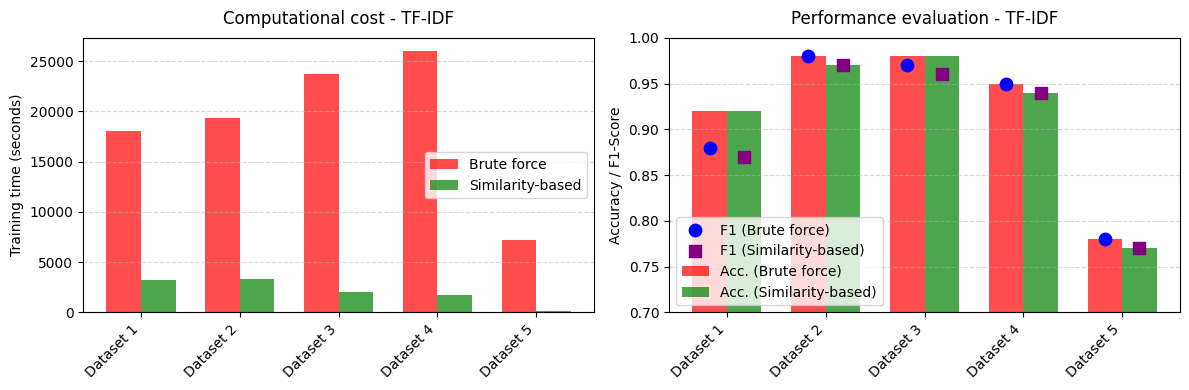

In [19]:
import matplotlib.pyplot as plt
import numpy as np

datasets = ["Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4", "Dataset 5"]
time_brute = [18087, 19352, 23779, 26023, 7205]  
time_smart = [3260, 3351, 2045, 1686, 169]        
models_brute = [73] * 5                     # Models/dataset (brute force)
models_smart = [1] * 5                      # Models/dataset (otimized)

# Metrics
accuracy_brute = [0.92, 0.98, 0.98, 0.95, 0.78]
f1_brute = [0.88, 0.98, 0.97, 0.95, 0.78]
accuracy_smart = [0.92, 0.97, 0.98, 0.94, 0.77]
f1_smart = [0.87, 0.97, 0.96, 0.94, 0.77]

# Figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# --- Subplot 1: Computational cost ---
x = np.arange(len(datasets))
width = 0.35

# Bars for training time
bars1 = ax1.bar(x - width/2, time_brute, width, label="Brute force", color="red", alpha=0.7)
bars2 = ax1.bar(x + width/2, time_smart, width, label="Similarity-based", color="green", alpha=0.7)

# Lines for number of models trained
#ax1b = ax1.twinx()
#ax1b.plot(x - width/2, models_brute, marker='o', color='blue', linestyle='--', label="Brute force (Trainings)")
#ax1b.plot(x + width/2, models_smart, marker='s', color='purple', linestyle='--', label="Similarity-based (Trainings)")
#ax1b.set_ylabel("Number of trained models", fontsize=10)

# Configuration
ax1.set_xticks(x)
ax1.set_xticklabels(datasets, rotation=45, ha="right")
ax1.set_ylabel("Training time (seconds)", fontsize=10)
ax1.set_title("Computational cost - TF-IDF", fontsize=12, pad=10)
ax1.legend(loc="center right")
ax1.grid(axis="y", linestyle="--", alpha=0.5)
#ax1b.legend(loc="right")

# --- Subplot 2: Metrics ---
x = np.arange(len(datasets))
width = 0.35

# Accuracy
bars1 = ax2.bar(x - width/2, accuracy_brute, width, label="Acc. (Brute force)", color="red", alpha=0.7)
bars2 = ax2.bar(x + width/2, accuracy_smart, width, label="Acc. (Similarity-based)", color="green", alpha=0.7)

# F1-Score
ax2.scatter(x - width/2, f1_brute, color="blue", marker="o", s=80, label="F1 (Brute force)", zorder=3)
ax2.scatter(x + width/2, f1_smart, color="purple", marker="s", s=80, label="F1 (Similarity-based)", zorder=3)

# Configuration
ax2.set_xticks(x)
ax2.set_xticklabels(datasets, rotation=45, ha="right")
ax2.set_ylabel("Accuracy / F1-Score", fontsize=10)
ax2.set_ylim(0.7, 1.0)
ax2.set_title("Performance evaluation - TF-IDF", fontsize=12, pad=10)
ax2.legend(loc="lower left")
ax2.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.savefig('Results TF-IDF')
plt.show()

## BoW

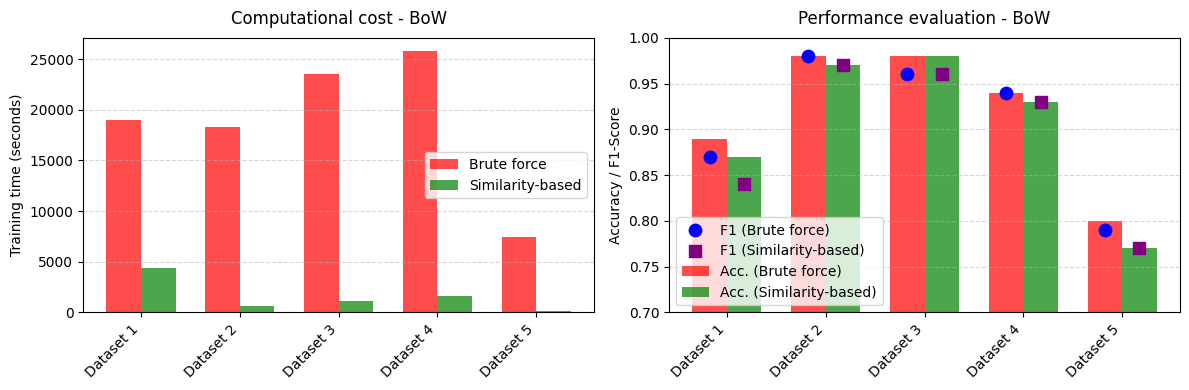

In [20]:
import matplotlib.pyplot as plt
import numpy as np

datasets = ["Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4", "Dataset 5"]
time_brute = [19019, 18316, 23539, 25808, 7469]  
time_smart = [4426, 599, 1087, 1599, 147]        
models_brute = [73] * 5                     # Models/dataset (brute force)
models_smart = [1] * 5                      # Models/dataset (otimized)

# Metrics
accuracy_brute = [0.89, 0.98, 0.98, 0.94, 0.8]
f1_brute = [0.87, 0.98, 0.96, 0.94, 0.79]
accuracy_smart = [0.87, 0.97, 0.98, 0.93, 0.77]
f1_smart = [0.84, 0.97, 0.96, 0.93, 0.77]

# Figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# --- Subplot 1: Computational cost ---
x = np.arange(len(datasets))
width = 0.35

# Bars for training time
bars1 = ax1.bar(x - width/2, time_brute, width, label="Brute force", color="red", alpha=0.7)
bars2 = ax1.bar(x + width/2, time_smart, width, label="Similarity-based", color="green", alpha=0.7)

# Lines for number of models (secondary axis)
# ax1b = ax1.twinx()
# ax1b.plot(x - width/2, models_brute, marker='o', color='blue', linestyle='--', label="Brute force (Trainings)")
# ax1b.plot(x + width/2, models_smart, marker='s', color='purple', linestyle='--', label="Similarity-based (Trainings)")
# ax1b.set_ylabel("Number of trained models", fontsize=10)

# Configuration

ax1.set_xticks(x)
ax1.set_xticklabels(datasets, rotation=45, ha="right")
ax1.set_ylabel("Training time (seconds)", fontsize=10)
ax1.set_title("Computational cost - BoW", fontsize=12, pad=10)
ax1.legend(loc="center right")
ax1.grid(axis="y", linestyle="--", alpha=0.5)
#ax1b.legend(loc="right")

# --- Subplot 2: Metrics ---
x = np.arange(len(datasets))
width = 0.35

# Accuracy
bars1 = ax2.bar(x - width/2, accuracy_brute, width, label="Acc. (Brute force)", color="red", alpha=0.7)
bars2 = ax2.bar(x + width/2, accuracy_smart, width, label="Acc. (Similarity-based)", color="green", alpha=0.7)

# F1-Score
ax2.scatter(x - width/2, f1_brute, color="blue", marker="o", s=80, label="F1 (Brute force)", zorder=3)
ax2.scatter(x + width/2, f1_smart, color="purple", marker="s", s=80, label="F1 (Similarity-based)", zorder=3)

# Configuration
ax2.set_xticks(x)
ax2.set_xticklabels(datasets, rotation=45, ha="right")
ax2.set_ylabel("Accuracy / F1-Score", fontsize=10)
ax2.set_ylim(0.7, 1.0)
ax2.set_title("Performance evaluation - BoW", fontsize=12, pad=10)
ax2.legend(loc="lower left")
ax2.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.savefig('Results BoW')
plt.show()

## Word2Vec

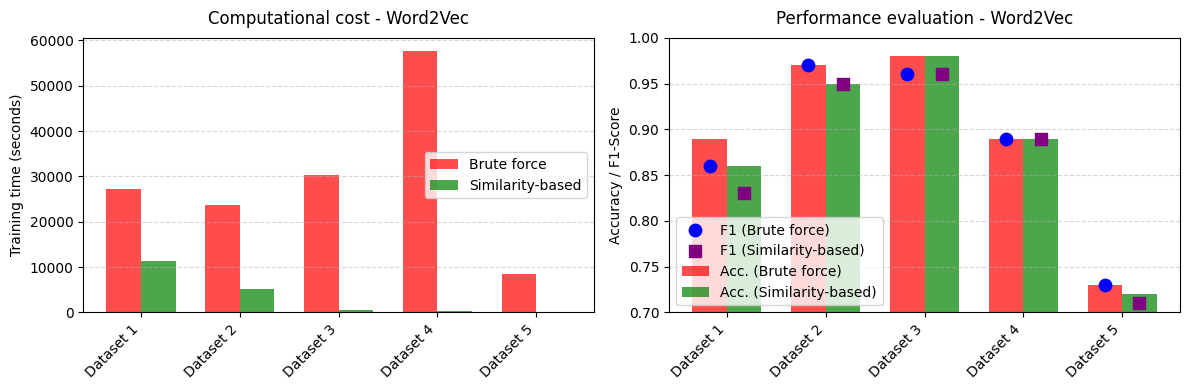

In [21]:
import matplotlib.pyplot as plt
import numpy as np

datasets = ["Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4", "Dataset 5"]
time_brute = [27147, 23630, 30271, 57689, 8463]  
time_smart = [11403, 5174, 507, 343, 106]        
models_brute = [73] * 5                     # Models/dataset (brute force)
models_smart = [1] * 5                       # Models/dataset (otimized)

# Metrics
accuracy_brute = [0.89, 0.97, 0.98, 0.89, 0.73]
f1_brute = [0.86, 0.97, 0.96, 0.89, 0.73]
accuracy_smart = [0.86, 0.95, 0.98, 0.89, 0.72]
f1_smart = [0.83, 0.95, 0.96, 0.89, 0.71]

# Figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# --- Subplot 1: Computational cost ---
x = np.arange(len(datasets))
width = 0.35

# Bars for training time
bars1 = ax1.bar(x - width/2, time_brute, width, label="Brute force", color="red", alpha=0.7)
bars2 = ax1.bar(x + width/2, time_smart, width, label="Similarity-based", color="green", alpha=0.7)

# Lines for number of models (secondary axis)
#ax1b = ax1.twinx()
#ax1b.plot(x - width/2, models_brute, marker='o', color='blue', linestyle='--', label="Brute force (Trainings)")
#ax1b.plot(x + width/2, models_smart, marker='s', color='purple', linestyle='--', label="Similarity-based (Trainings)")
#ax1b.set_ylabel("Number of trained models", fontsize=10)

# Configuration
ax1.set_xticks(x)
ax1.set_xticklabels(datasets, rotation=45, ha="right")
ax1.set_ylabel("Training time (seconds)", fontsize=10)
ax1.set_title("Computational cost - Word2Vec", fontsize=12, pad=10)
ax1.legend(loc="center right")
ax1.grid(axis="y", linestyle="--", alpha=0.5)
#ax1b.legend(loc="right")

# --- Subplot 2: Metrics ---
x = np.arange(len(datasets))
width = 0.35

# Accuracy
bars1 = ax2.bar(x - width/2, accuracy_brute, width, label="Acc. (Brute force)", color="red", alpha=0.7)
bars2 = ax2.bar(x + width/2, accuracy_smart, width, label="Acc. (Similarity-based)", color="green", alpha=0.7)

# F1-Score
ax2.scatter(x - width/2, f1_brute, color="blue", marker="o", s=80, label="F1 (Brute force)", zorder=3)
ax2.scatter(x + width/2, f1_smart, color="purple", marker="s", s=80, label="F1 (Similarity-based)", zorder=3)

# Configuration
ax2.set_xticks(x)
ax2.set_xticklabels(datasets, rotation=45, ha="right")
ax2.set_ylabel("Accuracy / F1-Score", fontsize=10)
ax2.set_ylim(0.7, 1.0)
ax2.set_title("Performance evaluation - Word2Vec", fontsize=12, pad=10)
ax2.legend(loc="lower left")
ax2.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.savefig('Results Word2Vec')
plt.show()